In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
import matplotlib.patches as mpatches #범례 그리기 위한 라이브러리

In [ ]:
import matplotlib.font_manager as fm
path = 'C:\\Users\\lsj32\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


슬립사이클 데모그래픽 그래프

In [ ]:
demo_users = pd.read_csv('슬립사이클/슬립사이클_데모그래픽_사용자구성.csv',index_col=0)

In [ ]:
demo_users

,Start,End,Age,Male,Female
0,2021-10-23,2022-01-22,전체,39.16 %,60.84 %
1,2021-10-23,2022-01-22,10대 이하,3.54 %,7.99 %
2,2021-10-23,2022-01-22,20대,19.74 %,28.51 %
3,2021-10-23,2022-01-22,30대,7.95 %,10.47 %
4,2021-10-23,2022-01-22,40대,4.68 %,7.42 %
5,2021-10-23,2022-01-22,50대,2.87 %,5.18 %
6,2021-10-23,2022-01-22,60대 이상,0.37 %,1.26 %


In [ ]:
demo_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Start   7 non-null      object
 1   End     7 non-null      object
 2   Age     7 non-null      object
 3   Male    7 non-null      object
 4   Female  7 non-null      object
dtypes: object(5)
memory usage: 336.0+ bytes


In [ ]:
print(demo_users)
demo_users.info()
del demo_users['Start']
del demo_users['End']
demo_users["Male"] = demo_users["Male"].str.replace(pat=r'[%]', repl=r'', regex=True)
demo_users["Female"] = demo_users["Female"].str.replace(pat=r'[%]', repl=r'', regex=True)
demo_users["Male"].astype('float64')
demo_users["Female"].astype('float64')
demo_anl = pd.melt(demo_users, id_vars=['Age'], value_vars = ["Male","Female"])
print(demo_anl)

        Start         End     Age     Male   Female
0  2021-10-23  2022-01-22      전체  39.16 %  60.84 %
1  2021-10-23  2022-01-22  10대 이하   3.54 %   7.99 %
2  2021-10-23  2022-01-22     20대  19.74 %  28.51 %
3  2021-10-23  2022-01-22     30대   7.95 %  10.47 %
4  2021-10-23  2022-01-22     40대   4.68 %   7.42 %
5  2021-10-23  2022-01-22     50대   2.87 %   5.18 %
6  2021-10-23  2022-01-22  60대 이상   0.37 %   1.26 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Start   7 non-null      object
 1   End     7 non-null      object
 2   Age     7 non-null      object
 3   Male    7 non-null      object
 4   Female  7 non-null      object
dtypes: object(5)
memory usage: 336.0+ bytes
       Age variable   value
0       전체     Male  39.16 
1   10대 이하     Male   3.54 
2      20대     Male  19.74 
3      30대     Male   7.95 
4      40대     Male   4.68 
5      50대     Male

In [ ]:
demo_anl = pd.melt(demo_users, id_vars=['Age'], value_vars = ["Male","Female"])
demo_anl

,Age,variable,value
0,전체,Male,39.16
1,10대 이하,Male,3.54
2,20대,Male,19.74
3,30대,Male,7.95
4,40대,Male,4.68
5,50대,Male,2.87
6,60대 이상,Male,0.37
7,전체,Female,60.84
8,10대 이하,Female,7.99
9,20대,Female,28.51


In [ ]:
pivot = demo_anl[demo_anl['Age']!='전체'].pivot(index='Age', columns = 'variable', values='value')
pivot = pivot[['Male','Female']].copy()
pivot

variable,Male,Female
Age,,
10대 이하,3.54,7.99
20대,19.74,28.51
30대,7.95,10.47
40대,4.68,7.42
50대,2.87,5.18
60대 이상,0.37,1.26


In [ ]:
mpl.get_cachedir()

'C:\\Users\\lsj32\\.matplotlib'

In [ ]:
demo_users

,Age,Male,Female
0,전체,39.16,60.84
1,10대 이하,3.54,7.99
2,20대,19.74,28.51
3,30대,7.95,10.47
4,40대,4.68,7.42
5,50대,2.87,5.18
6,60대 이상,0.37,1.26


In [ ]:
demo_users['All'] = np.nan
for i in range(len(demo_users)):
    demo_users['All'][i] = float(demo_users['Male'][i]) + float(demo_users['Female'][i])

<ipython-input-10-0eb11645a00c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_users['All'][i] = float(demo_users['Male'][i]) + float(demo_users['Female'][i])


In [ ]:
demo_users['All']

0    100.00
1     11.53
2     48.25
3     18.42
4     12.10
5      8.05
6      1.63
Name: All, dtype: float64

<ipython-input-66-74a98d1aa4fd>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


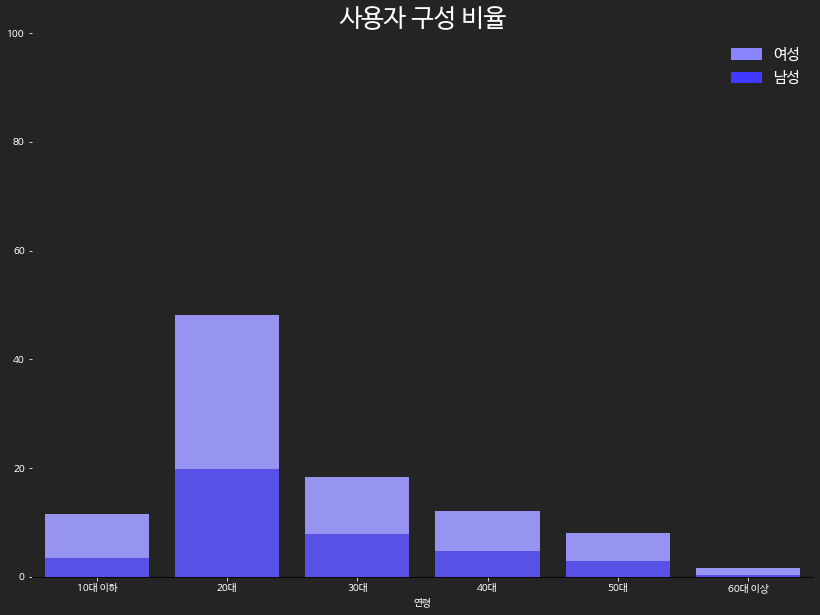

In [ ]:
plt.figure(figsize=(14,10))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

s1 = sns.barplot(data = demo_users[demo_users['Age']!='전체'], x = 'Age', y = 'All',color='#8984FF')
s2 = sns.barplot(data = demo_users[demo_users['Age']!='전체'], x = 'Age', y = 'Male',color='#4038FF')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!

ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.ylim([0,100])
plt.title('사용자 구성 비율',fontsize = 25, color = 'white')
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

variable_x = mpatches.Patch(color='#8984FF',label='여성')
variable_y = mpatches.Patch(color='#4038FF',label='남성')

leg = plt.legend(handles=[variable_x, variable_y],facecolor='#242424',edgecolor='#242424',
                 fontsize = 15,labelcolor='white')

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색

#for i, le in enumerate(leg.get_texts()): ## 범례 텍스트 클래스를 하나씩 돌면서 색을 설정한다.
    #le.set_color('white') ## 선 그래프의 색상을 가져온다.

plt.show()

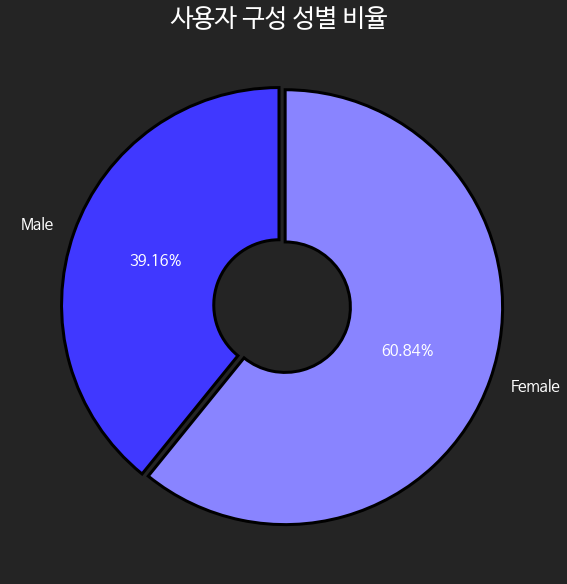

In [ ]:
plt.figure(figsize=(14,10))
patches, texts, autotexts = plt.pie([demo_users["Male"][0],demo_users["Female"][0]],
       labels=['Male','Female'],autopct='%.2f%%',
       startangle=90,explode=[0,0.03],
       wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3},
       colors = ['#4038FF','#8984FF'])

for t in texts:
    t.set_color("white")
    t.set_fontsize(15)

for t in autotexts:
    t.set_color("white")
    t.set_fontsize(15)
    
plt.title("사용자 구성 성별 비율",fontsize = 25, color = 'white' )

plt.show()

In [ ]:
demo_time = pd.read_csv('슬립사이클/슬립사이클_데모그래픽_사용시간구성.csv',index_col=0)


In [ ]:
print(demo_time)
demo_time.info()

demo_time["Male"] = demo_time["Male"].str.replace(pat=r'[%]', repl=r'', regex=True)
demo_time["Female"] = demo_time["Female"].str.replace(pat=r'[%]', repl=r'', regex=True)
del demo_time['Start']
del demo_time['End']
demo_time["Male"].astype('float64')
demo_time["Female"].astype('float64')

        Start         End     Age     Male   Female
0  2021-10-23  2022-01-22      전체  44.84 %  51.14 %
1  2021-10-23  2022-01-22  10대 이하   4.02 %   8.09 %
2  2021-10-23  2022-01-22     20대  30.15 %  23.76 %
3  2021-10-23  2022-01-22     30대   8.77 %   7.70 %
4  2021-10-23  2022-01-22     40대   3.75 %   5.30 %
5  2021-10-23  2022-01-22     50대   1.91 %   5.55 %
6  2021-10-23  2022-01-22  60대 이상   0.26 %   0.74 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Start   7 non-null      object
 1   End     7 non-null      object
 2   Age     7 non-null      object
 3   Male    7 non-null      object
 4   Female  7 non-null      object
dtypes: object(5)
memory usage: 336.0+ bytes


0    51.14
1     8.09
2    23.76
3     7.70
4     5.30
5     5.55
6     0.74
Name: Female, dtype: float64

In [ ]:
time_anl = pd.melt(demo_time, id_vars=['Age'], value_vars = ["Male","Female"])
print(time_anl)

       Age variable   value
0       전체     Male  44.84 
1   10대 이하     Male   4.02 
2      20대     Male  30.15 
3      30대     Male   8.77 
4      40대     Male   3.75 
5      50대     Male   1.91 
6   60대 이상     Male   0.26 
7       전체   Female  51.14 
8   10대 이하   Female   8.09 
9      20대   Female  23.76 
10     30대   Female   7.70 
11     40대   Female   5.30 
12     50대   Female   5.55 
13  60대 이상   Female   0.74 


<ipython-input-65-cd177cc1ed08>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


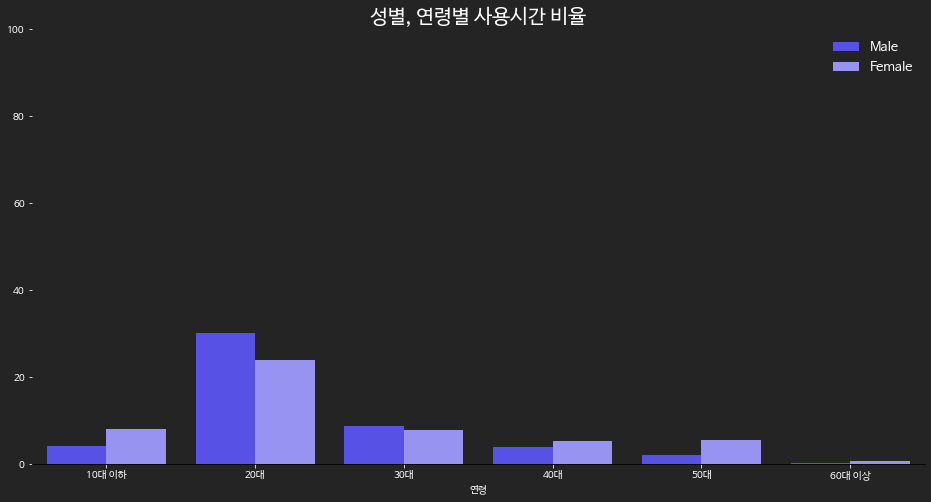

In [ ]:
plt.figure(figsize=(16,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기


sns.barplot(data = time_anl[time_anl['Age']!='전체'], x='Age',y='value',hue='variable',
           palette = ['#4038FF','#8984FF'])
plt.ylim([0,100])

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거


plt.legend(facecolor='#242424',edgecolor='#242424',
                 fontsize = 13,labelcolor='white')


ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색


plt.title('성별, 연령별 사용시간 비율',fontsize = 20, color = 'white')

plt.show()

In [ ]:
demo_users

,Age,Male,Female,All
0,전체,39.16,60.84,100.00
1,10대 이하,3.54,7.99,11.53
2,20대,19.74,28.51,48.25
3,30대,7.95,10.47,18.42
4,40대,4.68,7.42,12.10
5,50대,2.87,5.18,8.05
6,60대 이상,0.37,1.26,1.63


In [ ]:
demo_time

,Age,Male,Female
0,전체,44.84,51.14
1,10대 이하,4.02,8.09
2,20대,30.15,23.76
3,30대,8.77,7.70
4,40대,3.75,5.30
5,50대,1.91,5.55
6,60대 이상,0.26,0.74


In [ ]:
cycle = pd.read_csv('슬립사이클/슬립사이클_기본사용량_사용자_수.csv',index_col=0)

In [ ]:
cycle

,date,And
0,2021-10-23,"3,586 명"
1,2021-10-24,"4,338 명"
2,2021-10-25,"4,723 명"
3,2021-10-26,"4,771 명"
4,2021-10-27,"4,758 명"
...,...,...
87,2022-01-18,"4,566 명"
88,2022-01-19,"4,630 명"
89,2022-01-20,"4,425 명"
90,2022-01-21,"4,334 명"


In [ ]:
cycle2 = pd.read_csv('슬립사이클/슬립사이클_기본사용량_사용_시간.csv',index_col=0)

In [ ]:
cycle2

,date,Total_time,Personal_average_time
0,2021-10-23,632 시간,10.58 분
1,2021-10-24,683 시간,9.45 분
2,2021-10-25,945 시간,12.02 분
3,2021-10-26,811 시간,10.20 분
4,2021-10-27,723 시간,9.12 분
...,...,...,...
87,2022-01-18,801 시간,10.53 분
88,2022-01-19,848 시간,10.98 분
89,2022-01-20,784 시간,10.62 분
90,2022-01-21,750 시간,10.38 분


In [ ]:
usernum= demo_users[['Male','Female','All']].astype('float64').mul(4334/100).round()

In [ ]:
timenum = demo_time[['Male','Female','All']].astype('float64').mul(750/100).round()

In [ ]:
(timenum/usernum).mul(4334/750)

,Male,Female,All
0,1.144156,0.841490,0.960000
1,1.133072,1.018782,1.051717
2,1.525676,0.832203,1.116490
3,1.105484,0.738244,0.897938
4,0.797057,0.717847,0.749903
5,0.652430,1.078684,0.927236
6,0.722333,0.630400,0.651117


In [ ]:
rate

,Male,Female,Age
0,1.145046,0.840565,전체
1,1.135593,1.012516,10대 이하
2,1.527356,0.833392,20대
3,1.103145,0.735435,30대
4,0.801282,0.714286,40대
5,0.665505,1.071429,50대
6,0.702703,0.587302,60대 이상


In [ ]:
rate_all

,All,Age
0,0.959800,전체
1,1.050304,10대 이하
2,1.117306,20대
3,0.894137,30대
4,0.747934,40대
5,0.926708,50대
6,0.613497,60대 이상


In [ ]:
rate = demo_time[['Male','Female']].astype('float64')/demo_users[['Male','Female']].astype('float64')

In [ ]:
rate 

,Male,Female
0,1.145046,0.840565
1,1.135593,1.012516
2,1.527356,0.833392
3,1.103145,0.735435
4,0.801282,0.714286
5,0.665505,1.071429
6,0.702703,0.587302


In [ ]:
rate['Age'] = ['전체','10대 이하','20대','30대','40대','50대','60대 이상']

In [ ]:
rate_anl = pd.melt(rate, id_vars=['Age'], value_vars = ["Male","Female"])
rate_anl

,Age,variable,value
0,전체,Male,1.145046
1,10대 이하,Male,1.135593
2,20대,Male,1.527356
3,30대,Male,1.103145
4,40대,Male,0.801282
5,50대,Male,0.665505
6,60대 이상,Male,0.702703
7,전체,Female,0.840565
8,10대 이하,Female,1.012516
9,20대,Female,0.833392


<ipython-input-64-adc27121d0ce>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


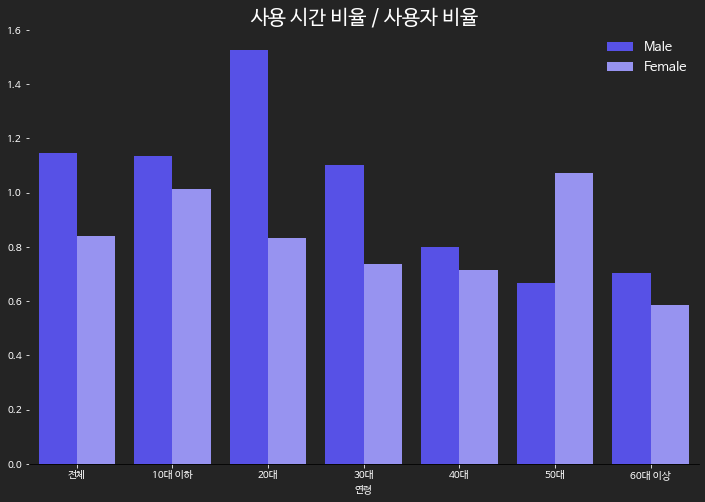

In [ ]:
plt.figure(figsize=(12,8))


sns.barplot(data = rate_anl, x='Age',y='value',hue='variable',palette = ['#4038FF','#8984FF'])

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거


plt.legend(facecolor='#242424',edgecolor='#242424',
                 fontsize = 13,labelcolor='white')


ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색


plt.title('사용 시간 비율 / 사용자 비율',fontsize = 20, color = 'white')
plt.show()


슬립모니터 데모그래픽 그래프

In [ ]:
demo_users = pd.read_csv('슬립모니터/슬립모니터_데모그래픽_사용자구성.csv',index_col=0)

In [ ]:
demo_users

,Start,End,Age,Male,Female
0,2021-10-23,2022-01-22,전체,34.76 %,65.24 %
1,2021-10-23,2022-01-22,10대 이하,3.78 %,8.43 %
2,2021-10-23,2022-01-22,20대,12.81 %,29.41 %
3,2021-10-23,2022-01-22,30대,8.11 %,12.30 %
4,2021-10-23,2022-01-22,40대,5.54 %,8.94 %
5,2021-10-23,2022-01-22,50대,3.94 %,4.46 %
6,2021-10-23,2022-01-22,60대 이상,0.59 %,1.69 %


In [ ]:
demo_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Start   7 non-null      object
 1   End     7 non-null      object
 2   Age     7 non-null      object
 3   Male    7 non-null      object
 4   Female  7 non-null      object
dtypes: object(5)
memory usage: 336.0+ bytes


In [ ]:
print(demo_users)
demo_users.info()
del demo_users['Start']
del demo_users['End']
demo_users["Male"] = demo_users["Male"].str.replace(pat=r'[%]', repl=r'', regex=True)
demo_users["Female"] = demo_users["Female"].str.replace(pat=r'[%]', repl=r'', regex=True)
demo_users["Male"].astype('float64')
demo_users["Female"].astype('float64')
demo_anl = pd.melt(demo_users, id_vars=['Age'], value_vars = ["Male","Female"])
print(demo_anl)

        Start         End     Age     Male   Female
0  2021-10-23  2022-01-22      전체  34.76 %  65.24 %
1  2021-10-23  2022-01-22  10대 이하   3.78 %   8.43 %
2  2021-10-23  2022-01-22     20대  12.81 %  29.41 %
3  2021-10-23  2022-01-22     30대   8.11 %  12.30 %
4  2021-10-23  2022-01-22     40대   5.54 %   8.94 %
5  2021-10-23  2022-01-22     50대   3.94 %   4.46 %
6  2021-10-23  2022-01-22  60대 이상   0.59 %   1.69 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Start   7 non-null      object
 1   End     7 non-null      object
 2   Age     7 non-null      object
 3   Male    7 non-null      object
 4   Female  7 non-null      object
dtypes: object(5)
memory usage: 336.0+ bytes
       Age variable   value
0       전체     Male  34.76 
1   10대 이하     Male   3.78 
2      20대     Male  12.81 
3      30대     Male   8.11 
4      40대     Male   5.54 
5      50대     Male

In [ ]:
demo_anl = pd.melt(demo_users, id_vars=['Age'], value_vars = ["Male","Female"])
demo_anl

,Age,variable,value
0,전체,Male,34.76
1,10대 이하,Male,3.78
2,20대,Male,12.81
3,30대,Male,8.11
4,40대,Male,5.54
5,50대,Male,3.94
6,60대 이상,Male,0.59
7,전체,Female,65.24
8,10대 이하,Female,8.43
9,20대,Female,29.41


In [ ]:
demo_users

,Age,Male,Female
0,전체,34.76,65.24
1,10대 이하,3.78,8.43
2,20대,12.81,29.41
3,30대,8.11,12.30
4,40대,5.54,8.94
5,50대,3.94,4.46
6,60대 이상,0.59,1.69


In [ ]:
demo_users['All'] = np.nan
for i in range(len(demo_users)):
    demo_users['All'][i] = float(demo_users['Male'][i]) + float(demo_users['Female'][i])

<ipython-input-13-0eb11645a00c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_users['All'][i] = float(demo_users['Male'][i]) + float(demo_users['Female'][i])


In [ ]:
demo_users['All']

0    100.00
1     12.21
2     42.22
3     20.41
4     14.48
5      8.40
6      2.28
Name: All, dtype: float64

<ipython-input-16-74a98d1aa4fd>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


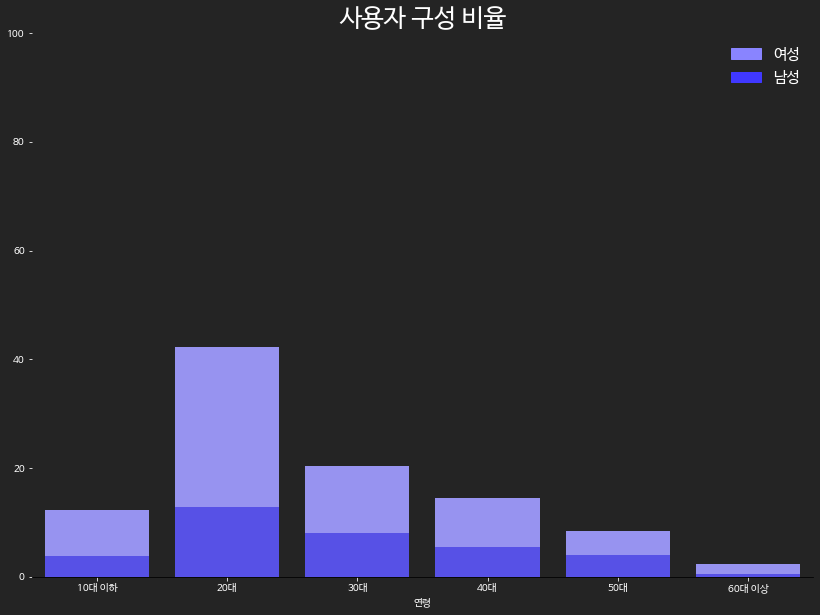

In [ ]:
plt.figure(figsize=(14,10))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

s1 = sns.barplot(data = demo_users[demo_users['Age']!='전체'], x = 'Age', y = 'All',color='#8984FF')
s2 = sns.barplot(data = demo_users[demo_users['Age']!='전체'], x = 'Age', y = 'Male',color='#4038FF')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!

ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.ylim([0,100])
plt.title('사용자 구성 비율',fontsize = 25, color = 'white')
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

variable_x = mpatches.Patch(color='#8984FF',label='여성')
variable_y = mpatches.Patch(color='#4038FF',label='남성')

leg = plt.legend(handles=[variable_x, variable_y],facecolor='#242424',edgecolor='#242424',
                 fontsize = 15,labelcolor='white')

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색

#for i, le in enumerate(leg.get_texts()): ## 범례 텍스트 클래스를 하나씩 돌면서 색을 설정한다.
    #le.set_color('white') ## 선 그래프의 색상을 가져온다.

plt.show()

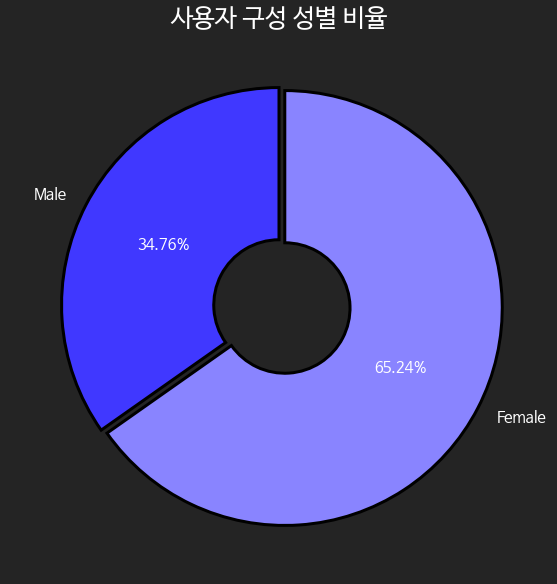

In [ ]:
plt.figure(figsize=(14,10))
patches, texts, autotexts = plt.pie([demo_users["Male"][0],demo_users["Female"][0]],
       labels=['Male','Female'],autopct='%.2f%%',
       startangle=90,explode=[0,0.03],
       wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3},
       colors = ['#4038FF','#8984FF'])

for t in texts:
    t.set_color("white")
    t.set_fontsize(15)

for t in autotexts:
    t.set_color("white")
    t.set_fontsize(15)
    
plt.title("사용자 구성 성별 비율",fontsize = 25, color = 'white' )

plt.show()

In [ ]:
demo_time = pd.read_csv('슬립모니터/슬립모니터_데모그래픽_사용시간구성.csv',index_col=0)


In [ ]:
print(demo_time)
demo_time.info()

demo_time["Male"] = demo_time["Male"].str.replace(pat=r'[%]', repl=r'', regex=True)
demo_time["Female"] = demo_time["Female"].str.replace(pat=r'[%]', repl=r'', regex=True)
del demo_time['Start']
del demo_time['End']
demo_time["Male"].astype('float64')
demo_time["Female"].astype('float64')

        Start         End     Age     Male   Female
0  2021-10-23  2022-01-22      전체  33.05 %  63.23 %
1  2021-10-23  2022-01-22  10대 이하   3.72 %  10.78 %
2  2021-10-23  2022-01-22     20대  12.76 %  24.84 %
3  2021-10-23  2022-01-22     30대   8.30 %  10.35 %
4  2021-10-23  2022-01-22     40대   6.56 %  11.76 %
5  2021-10-23  2022-01-22     50대   2.81 %   3.50 %
6  2021-10-23  2022-01-22  60대 이상   2.61 %   2.00 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Start   7 non-null      object
 1   End     7 non-null      object
 2   Age     7 non-null      object
 3   Male    7 non-null      object
 4   Female  7 non-null      object
dtypes: object(5)
memory usage: 336.0+ bytes


0    63.23
1    10.78
2    24.84
3    10.35
4    11.76
5     3.50
6     2.00
Name: Female, dtype: float64

In [ ]:
time_anl = pd.melt(demo_time, id_vars=['Age'], value_vars = ["Male","Female"])
print(time_anl)

       Age variable   value
0       전체     Male  33.05 
1   10대 이하     Male   3.72 
2      20대     Male  12.76 
3      30대     Male   8.30 
4      40대     Male   6.56 
5      50대     Male   2.81 
6   60대 이상     Male   2.61 
7       전체   Female  63.23 
8   10대 이하   Female  10.78 
9      20대   Female  24.84 
10     30대   Female  10.35 
11     40대   Female  11.76 
12     50대   Female   3.50 
13  60대 이상   Female   2.00 


<ipython-input-21-cd177cc1ed08>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


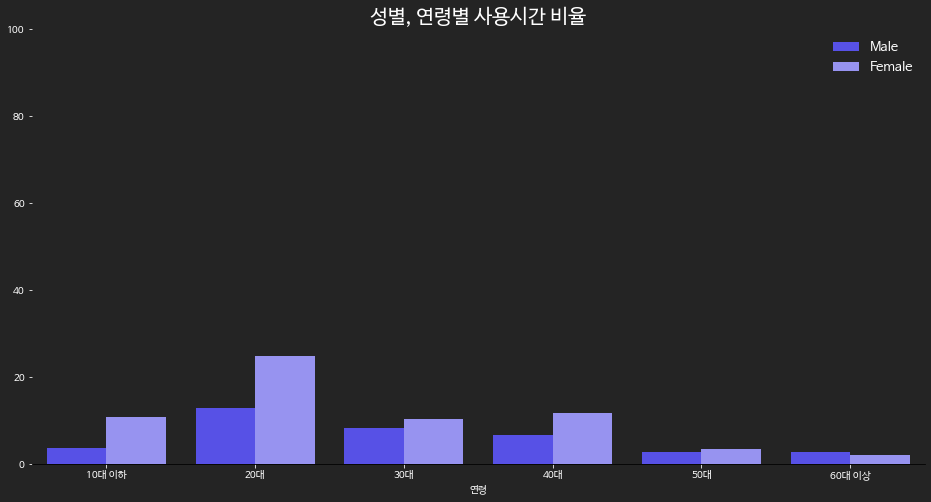

In [ ]:
plt.figure(figsize=(16,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기


sns.barplot(data = time_anl[time_anl['Age']!='전체'], x='Age',y='value',hue='variable',
           palette = ['#4038FF','#8984FF'])
plt.ylim([0,100])

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거


plt.legend(facecolor='#242424',edgecolor='#242424',
                 fontsize = 13,labelcolor='white')


ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색


plt.title('성별, 연령별 사용시간 비율',fontsize = 20, color = 'white')

plt.show()

In [ ]:
rate = demo_time[['Male','Female']].astype('float64')/demo_users[['Male','Female']].astype('float64')

In [ ]:
rate['Age'] = ['전체','10대 이하','20대','30대','40대','50대','60대 이상']

In [ ]:
rate_anl = pd.melt(rate, id_vars=['Age'], value_vars = ["Male","Female"])
rate_anl

,Age,variable,value
0,전체,Male,0.950806
1,10대 이하,Male,0.984127
2,20대,Male,0.996097
3,30대,Male,1.023428
4,40대,Male,1.184116
5,50대,Male,0.713198
6,60대 이상,Male,4.423729
7,전체,Female,0.969191
8,10대 이하,Female,1.278766
9,20대,Female,0.844611


<ipython-input-27-adc27121d0ce>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


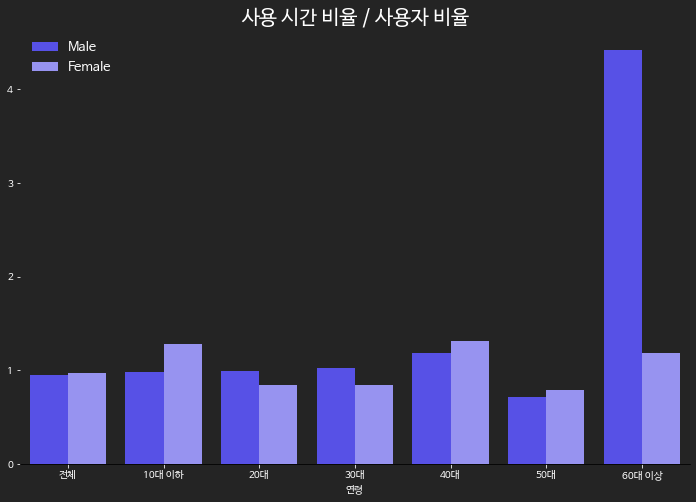

In [ ]:
plt.figure(figsize=(12,8))


sns.barplot(data = rate_anl, x='Age',y='value',hue='variable',palette = ['#4038FF','#8984FF'])

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거


plt.legend(facecolor='#242424',edgecolor='#242424',
                 fontsize = 13,labelcolor='white')


ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색


plt.title('사용 시간 비율 / 사용자 비율',fontsize = 20, color = 'white')
plt.show()


수면소리 데모그래픽 그래프

In [ ]:
demo_users = pd.read_csv('수면소리/수면소리_데모그래픽_사용자구성.csv',index_col=0)

In [ ]:
print(demo_users)
demo_users.info()
del demo_users['Start']
del demo_users['End']
demo_users["Male"] = demo_users["Male"].str.replace(pat=r'[%]', repl=r'', regex=True)
demo_users["Female"] = demo_users["Female"].str.replace(pat=r'[%]', repl=r'', regex=True)
demo_users["Male"].astype('float64')
demo_users["Female"].astype('float64')
demo_anl = pd.melt(demo_users, id_vars=['Age'], value_vars = ["Male","Female"])
print(demo_anl)

        Start         End     Age     Male   Female
0  2021-10-23  2022-01-22      전체  43.54 %  56.46 %
1  2021-10-23  2022-01-22  10대 이하   1.60 %   2.52 %
2  2021-10-23  2022-01-22     20대   5.40 %   7.62 %
3  2021-10-23  2022-01-22     30대  11.10 %  15.82 %
4  2021-10-23  2022-01-22     40대  13.74 %  17.69 %
5  2021-10-23  2022-01-22     50대   9.57 %   9.67 %
6  2021-10-23  2022-01-22  60대 이상   2.13 %   3.14 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Start   7 non-null      object
 1   End     7 non-null      object
 2   Age     7 non-null      object
 3   Male    7 non-null      object
 4   Female  7 non-null      object
dtypes: object(5)
memory usage: 336.0+ bytes
       Age variable   value
0       전체     Male  43.54 
1   10대 이하     Male   1.60 
2      20대     Male   5.40 
3      30대     Male  11.10 
4      40대     Male  13.74 
5      50대     Male

In [ ]:
demo_anl = pd.melt(demo_users, id_vars=['Age'], value_vars = ["Male","Female"])
demo_anl

,Age,variable,value
0,전체,Male,43.54
1,10대 이하,Male,1.60
2,20대,Male,5.40
3,30대,Male,11.10
4,40대,Male,13.74
5,50대,Male,9.57
6,60대 이상,Male,2.13
7,전체,Female,56.46
8,10대 이하,Female,2.52
9,20대,Female,7.62


In [ ]:
demo_users['All'] = np.nan
for i in range(len(demo_users)):
    demo_users['All'][i] = float(demo_users['Male'][i]) + float(demo_users['Female'][i])

<ipython-input-10-0eb11645a00c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_users['All'][i] = float(demo_users['Male'][i]) + float(demo_users['Female'][i])


In [ ]:
demo_users['All']

0    100.00
1      4.12
2     13.02
3     26.92
4     31.43
5     19.24
6      5.27
Name: All, dtype: float64

<ipython-input-13-74a98d1aa4fd>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


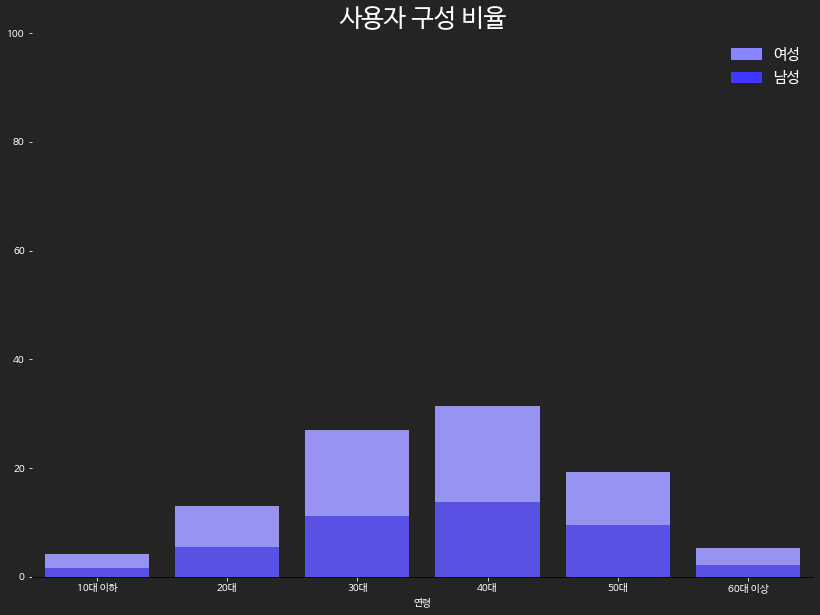

In [ ]:
plt.figure(figsize=(14,10))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

s1 = sns.barplot(data = demo_users[demo_users['Age']!='전체'], x = 'Age', y = 'All',color='#8984FF')
s2 = sns.barplot(data = demo_users[demo_users['Age']!='전체'], x = 'Age', y = 'Male',color='#4038FF')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!

ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.ylim([0,100])
plt.title('사용자 구성 비율',fontsize = 25, color = 'white')
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

variable_x = mpatches.Patch(color='#8984FF',label='여성')
variable_y = mpatches.Patch(color='#4038FF',label='남성')

leg = plt.legend(handles=[variable_x, variable_y],facecolor='#242424',edgecolor='#242424',
                 fontsize = 15,labelcolor='white')

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색

#for i, le in enumerate(leg.get_texts()): ## 범례 텍스트 클래스를 하나씩 돌면서 색을 설정한다.
    #le.set_color('white') ## 선 그래프의 색상을 가져온다.

plt.show()

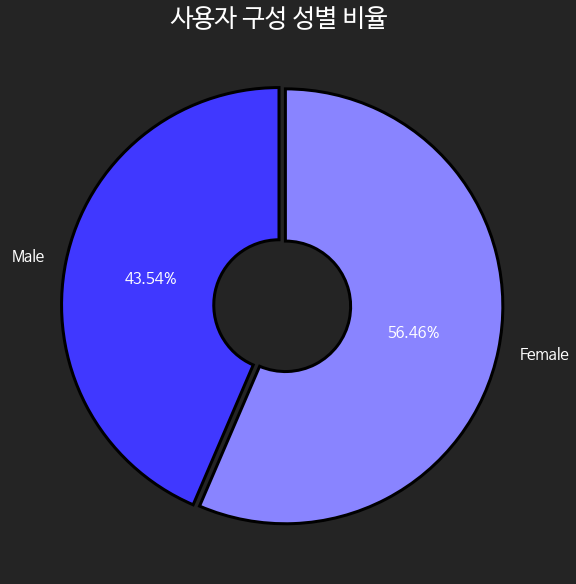

In [ ]:
plt.figure(figsize=(14,10))
patches, texts, autotexts = plt.pie([demo_users["Male"][0],demo_users["Female"][0]],
       labels=['Male','Female'],autopct='%.2f%%',
       startangle=90,explode=[0,0.03],
       wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3},
       colors = ['#4038FF','#8984FF'])

for t in texts:
    t.set_color("white")
    t.set_fontsize(15)

for t in autotexts:
    t.set_color("white")
    t.set_fontsize(15)
    
plt.title("사용자 구성 성별 비율",fontsize = 25, color = 'white' )

plt.show()

In [ ]:
demo_time = pd.read_csv('수면소리/수면소리_데모그래픽_사용시간구성.csv',index_col=0)


In [ ]:
print(demo_time)
demo_time.info()

demo_time["Male"] = demo_time["Male"].str.replace(pat=r'[%]', repl=r'', regex=True)
demo_time["Female"] = demo_time["Female"].str.replace(pat=r'[%]', repl=r'', regex=True)
del demo_time['Start']
del demo_time['End']
demo_time["Male"].astype('float64')
demo_time["Female"].astype('float64')

        Start         End     Age     Male   Female
0  2021-10-23  2022-01-22      전체  46.42 %  52.54 %
1  2021-10-23  2022-01-22  10대 이하   1.05 %   0.91 %
2  2021-10-23  2022-01-22     20대   5.24 %   6.51 %
3  2021-10-23  2022-01-22     30대  13.46 %  16.25 %
4  2021-10-23  2022-01-22     40대  13.92 %  14.33 %
5  2021-10-23  2022-01-22     50대  11.88 %   9.62 %
6  2021-10-23  2022-01-22  60대 이상   1.91 %   4.92 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Start   7 non-null      object
 1   End     7 non-null      object
 2   Age     7 non-null      object
 3   Male    7 non-null      object
 4   Female  7 non-null      object
dtypes: object(5)
memory usage: 336.0+ bytes


0    52.54
1     0.91
2     6.51
3    16.25
4    14.33
5     9.62
6     4.92
Name: Female, dtype: float64

In [ ]:
time_anl = pd.melt(demo_time, id_vars=['Age'], value_vars = ["Male","Female"])
print(time_anl)

       Age variable   value
0       전체     Male  46.42 
1   10대 이하     Male   1.05 
2      20대     Male   5.24 
3      30대     Male  13.46 
4      40대     Male  13.92 
5      50대     Male  11.88 
6   60대 이상     Male   1.91 
7       전체   Female  52.54 
8   10대 이하   Female   0.91 
9      20대   Female   6.51 
10     30대   Female  16.25 
11     40대   Female  14.33 
12     50대   Female   9.62 
13  60대 이상   Female   4.92 


<ipython-input-18-cd177cc1ed08>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


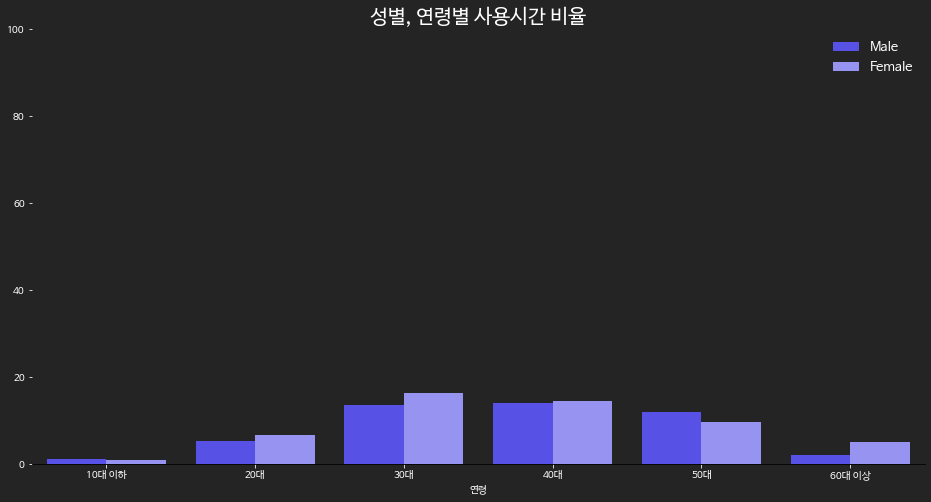

In [ ]:
plt.figure(figsize=(16,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기


sns.barplot(data = time_anl[time_anl['Age']!='전체'], x='Age',y='value',hue='variable',
           palette = ['#4038FF','#8984FF'])
plt.ylim([0,100])

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거


plt.legend(facecolor='#242424',edgecolor='#242424',
                 fontsize = 13,labelcolor='white')


ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색


plt.title('성별, 연령별 사용시간 비율',fontsize = 20, color = 'white')

plt.show()

In [ ]:
rate = demo_time[['Male','Female']].astype('float64')/demo_users[['Male','Female']].astype('float64')

In [ ]:
rate['Age'] = ['전체','10대 이하','20대','30대','40대','50대','60대 이상']

In [ ]:
rate_anl = pd.melt(rate, id_vars=['Age'], value_vars = ["Male","Female"])
rate_anl

,Age,variable,value
0,전체,Male,1.066146
1,10대 이하,Male,0.656250
2,20대,Male,0.970370
3,30대,Male,1.212613
4,40대,Male,1.013100
5,50대,Male,1.241379
6,60대 이상,Male,0.896714
7,전체,Female,0.930570
8,10대 이하,Female,0.361111
9,20대,Female,0.854331


<ipython-input-24-adc27121d0ce>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


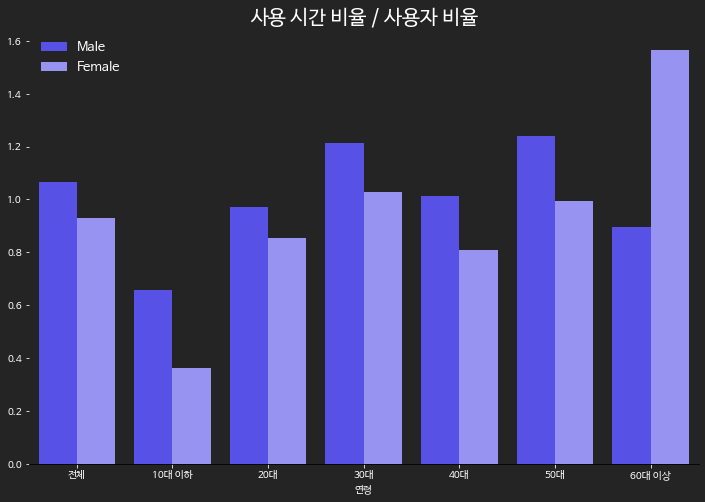

In [ ]:
plt.figure(figsize=(12,8))


sns.barplot(data = rate_anl, x='Age',y='value',hue='variable',palette = ['#4038FF','#8984FF'])

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거


plt.legend(facecolor='#242424',edgecolor='#242424',
                 fontsize = 13,labelcolor='white')


ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색


plt.title('사용 시간 비율 / 사용자 비율',fontsize = 20, color = 'white')
plt.show()


Calm 데모그래픽 그래프

In [ ]:
calm_demo_users = pd.read_csv('Calm/Calm_데모그래픽_사용자구성.csv',index_col=0)

In [ ]:
print(calm_demo_users)
calm_demo_users.info()
del calm_demo_users['Start']
del calm_demo_users['End']
calm_demo_users["Male"] = calm_demo_users["Male"].str.replace(pat=r'[%]', repl=r'', regex=True)
calm_demo_users["Female"] = calm_demo_users["Female"].str.replace(pat=r'[%]', repl=r'', regex=True)
calm_demo_users["Male"].astype('float64')
calm_demo_users["Female"].astype('float64')
calm_demo_anl = pd.melt(calm_demo_users, id_vars=['Age'], value_vars = ["Male","Female"])
print(calm_demo_anl)

In [ ]:
calm_demo_anl = pd.melt(calm_demo_users, id_vars=['Age'], value_vars = ["Male","Female"])
calm_demo_anl

,Age,variable,value
0,전체,Male,34.19
1,10대 이하,Male,1.34
2,20대,Male,8.88
3,30대,Male,10.31
4,40대,Male,8.65
5,50대,Male,4.15
6,60대 이상,Male,0.87
7,전체,Female,65.81
8,10대 이하,Female,1.72
9,20대,Female,19.15


In [ ]:
calm_demo_users['All'] = np.nan
for i in range(len(calm_demo_users)):
    calm_demo_users['All'][i] = float(calm_demo_users['Male'][i]) + float(calm_demo_users['Female'][i])

<ipython-input-47-116cf4c96290>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calm_demo_users['All'][i] = float(calm_demo_users['Male'][i]) + float(calm_demo_users['Female'][i])


<ipython-input-69-d9107cb3e3ad>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


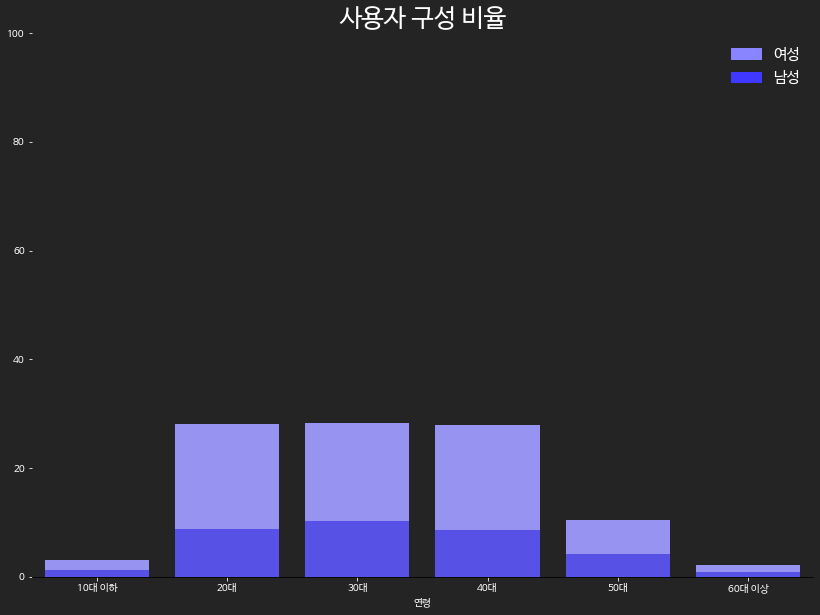

In [ ]:
plt.figure(figsize=(14,10))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

s1 = sns.barplot(data = calm_demo_users[calm_demo_users['Age']!='전체'], x = 'Age', y = 'All',color='#8984FF')
s2 = sns.barplot(data = calm_demo_users[calm_demo_users['Age']!='전체'], x = 'Age', y = 'Male',color='#4038FF')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!

ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.ylim([0,100])
plt.title('사용자 구성 비율',fontsize = 25, color = 'white')
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색

variable_x = mpatches.Patch(color='#8984FF',label='여성')
variable_y = mpatches.Patch(color='#4038FF',label='남성')

leg = plt.legend(handles=[variable_x, variable_y],facecolor='#242424',edgecolor='#242424',
                 fontsize = 15,labelcolor='white')

#for i, le in enumerate(leg.get_texts()): ## 범례 텍스트 클래스를 하나씩 돌면서 색을 설정한다.
    #le.set_color('white') ## 선 그래프의 색상을 가져온다.

plt.show()

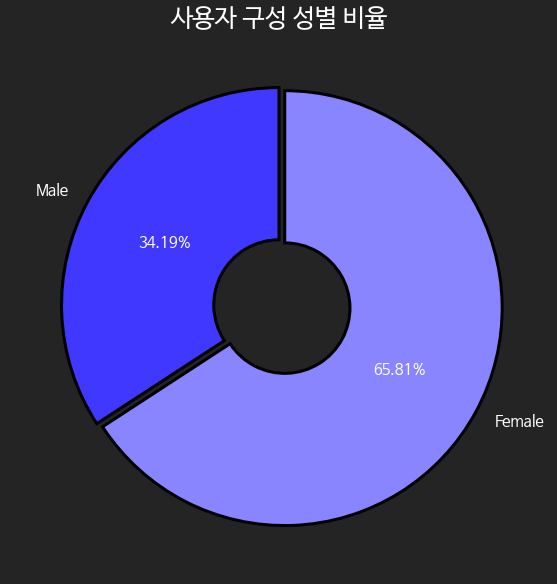

In [ ]:
plt.figure(figsize=(14,10))
patches, texts, autotexts = plt.pie([calm_demo_users["Male"][0],calm_demo_users["Female"][0]],
       labels=['Male','Female'],autopct='%.2f%%',
       startangle=90,explode=[0,0.03],
       wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3},
       colors = ['#4038FF','#8984FF'])

for t in texts:
    t.set_color("white")
    t.set_fontsize(15)

for t in autotexts:
    t.set_color("white")
    t.set_fontsize(15)
    
plt.title("사용자 구성 성별 비율",fontsize = 25, color = 'white' )

plt.show()

In [ ]:
calm_demo_time = pd.read_csv('Calm/Calm_데모그래픽_사용시간구성.csv',index_col=0)


In [ ]:
print(calm_demo_time)
calm_demo_time.info()
calm_demo_time["Male"] = calm_demo_time["Male"].str.replace(pat=r'[%]', repl=r'', regex=True)
calm_demo_time["Female"] = calm_demo_time["Female"].str.replace(pat=r'[%]', repl=r'', regex=True)
del calm_demo_time['Start']
del calm_demo_time['End']
calm_demo_time["Male"].astype('float64')
calm_demo_time["Female"].astype('float64')

calm_time_anl = pd.melt(calm_demo_time, id_vars=['Age'], value_vars = ["Male","Female"])
print(calm_time_anl)

<ipython-input-64-d3750e271f59>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


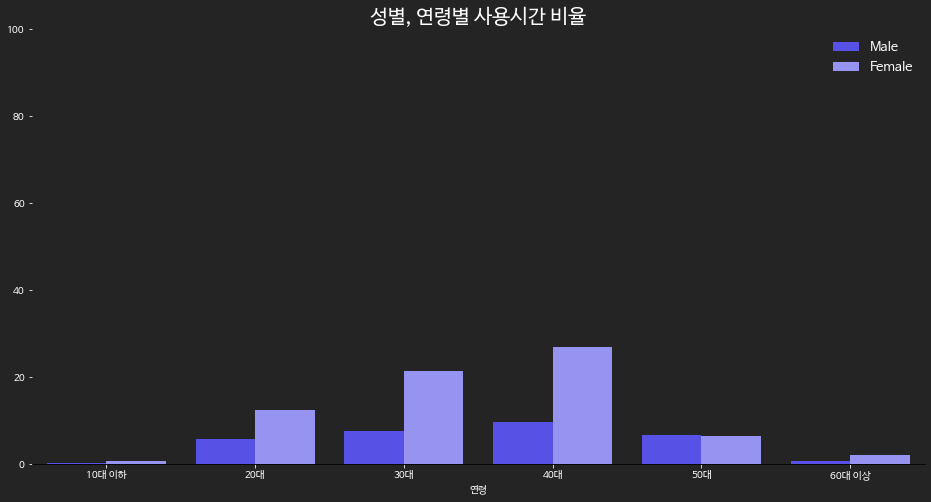

In [ ]:
plt.figure(figsize=(16,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기


sns.barplot(data = calm_time_anl[calm_time_anl['Age']!='전체'], x='Age',y='value',hue='variable',
           palette = ['#4038FF','#8984FF'])
plt.ylim([0,100])

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거


plt.legend(facecolor='#242424',edgecolor='#242424',
                 fontsize = 13,labelcolor='white')


ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색
plt.xlabel('연령',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색

plt.title('성별, 연령별 사용시간 비율',fontsize = 20, color = 'white')

plt.show()

In [ ]:
calm_rate = calm_demo_time[['Male','Female']]/calm_demo_users[['Male','Female']]

In [ ]:
calm_rate['Age'] = ['전체','10대 이하','20대','30대','40대','50대','60대 이상']

In [ ]:
calm_rate_anl = pd.melt(calm_rate, id_vars=['Age'], value_vars = ["Male","Female"])
calm_rate_anl

,Age,variable,value
0,전체,Male,0.879497
1,10대 이하,Male,0.201493
2,20대,Male,0.632883
3,30대,Male,0.729389
4,40대,Male,1.121387
5,50대,Male,1.573494
6,60대 이상,Male,0.816092
7,전체,Female,1.058502
8,10대 이하,Female,0.424419
9,20대,Female,0.643864


<ipython-input-62-64982c50e977>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


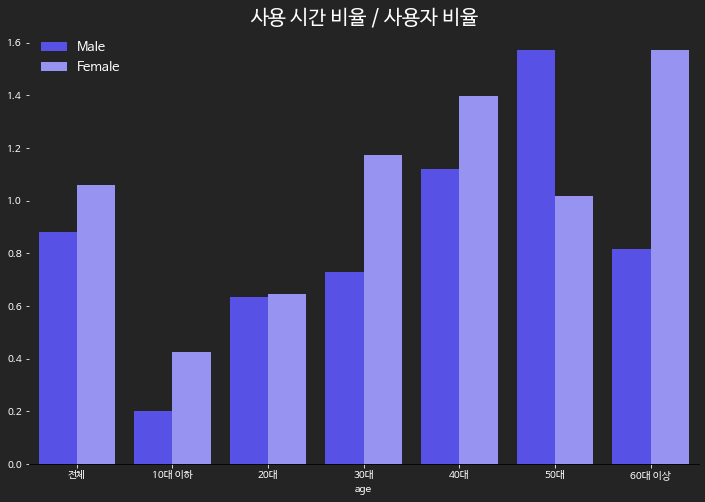

In [ ]:
plt.figure(figsize=(12,8))


sns.barplot(data = calm_rate_anl, x='Age',y='value',hue='variable',palette = ['#4038FF','#8984FF'])

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거


plt.legend(facecolor='#242424',edgecolor='#242424',
                 fontsize = 13,labelcolor='white')


ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

plt.xlabel('age',color='white') #x축단어설정, 흰색
plt.ylabel('',color='white') #x축단어설정, 흰색

plt.title('사용 시간 비율 / 사용자 비율',fontsize = 20, color = 'white')
plt.show()

#50대는 남성이, 60대 이상은 여성이 이를 많이 사용하는 것으로 나타남.

경쟁사별 DAU 시계열 그래프

In [ ]:
monn = pd.read_csv('슬립모니터/슬립모니터_기본사용량_사용자_수.csv',index_col=0)
monn['date'] = pd.to_datetime(monn['date'])
monn["And"] = monn["And"].str.replace(pat=r'[명]', repl=r'', regex=True)
monn["And"] = monn["And"].str.replace(pat=r'[,]', repl=r'', regex=True)
monn["And"] = monn["And"].astype('float64')

In [ ]:
calmn = pd.read_csv('Calm/Calm_기본사용량_사용자_수.csv',index_col=0)
calmn['date'] = pd.to_datetime(calmn['date'])
calmn["And"] = calmn["And"].str.replace(pat=r'[명]', repl=r'', regex=True)
calmn["And"] = calmn["And"].str.replace(pat=r'[,]', repl=r'', regex=True)
calmn["And"] = calmn["And"].astype('float64')
calmn

,date,And
0,2021-10-20,1829.0
1,2021-10-21,1763.0
2,2021-10-22,1532.0
3,2021-10-23,1320.0
4,2021-10-24,1566.0
...,...,...
87,2022-01-15,1748.0
88,2022-01-16,1878.0
89,2022-01-17,1998.0
90,2022-01-18,1898.0


In [ ]:
soundn = pd.read_csv('수면소리/수면소리_기본사용량_사용자_수.csv',index_col=0)
soundn['date'] = pd.to_datetime(soundn['date'])
soundn["And"] = soundn["And"].str.replace(pat=r'[명]', repl=r'', regex=True)
soundn["And"] = soundn["And"].str.replace(pat=r'[,]', repl=r'', regex=True)
soundn["And"] = soundn["And"].astype('float64')

In [ ]:
cyclen = pd.read_csv('슬립사이클/슬립사이클_기본사용량_사용자_수.csv',index_col=0)
cyclen['date'] = pd.to_datetime(cyclen['date'])
cyclen["And"] = cyclen["And"].str.replace(pat=r'[명]', repl=r'', regex=True)
cyclen["And"] = cyclen["And"].str.replace(pat=r'[,]', repl=r'', regex=True)
cyclen["And"] = cyclen["And"].astype('float64')

In [ ]:
snoren = pd.read_csv('스노어랩/스노어랩_기본사용량_사용자_수.csv',index_col=0)
snoren['date'] = pd.to_datetime(snoren['date'])
snoren["And"] = snoren["And"].str.replace(pat=r'[명]', repl=r'', regex=True)
snoren["And"] = snoren["And"].str.replace(pat=r'[,]', repl=r'', regex=True)
snoren["And"] = snoren["And"].astype('float64')

<ipython-input-41-74200f49dc74>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) #grid 아예 없앤거!


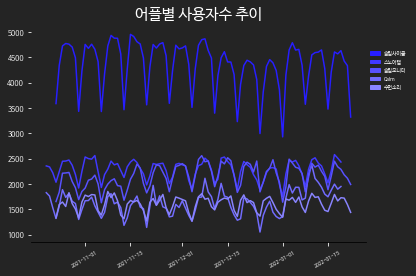

In [ ]:
plt.figsize=(22,10)
s1 = plt.plot(calmn['date'],calmn['And'],color='#716BFF')
#s2 = plt.plot(SaAn['date'],SaAn['And'],color='red')
s3 = plt.plot(soundn['date'],soundn['And'],color='#8984FF')
s4 = plt.plot(snoren['date'],snoren['And'],color='#4038FF') #...
s5 = plt.plot(monn['date'],monn['And'],color='#5851FF')
s6 = plt.plot(cyclen['date'],cyclen['And'],color='#271EFF')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!

ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
ax.tick_params(axis='x', colors='white') #y축 변수들 흰색

plt.xticks(rotation=30,fontsize = 5)
plt.yticks(fontsize = 7)

variable_1 = mpatches.Patch(color='#8984FF',label='수면소리')
variable_2 = mpatches.Patch(color='#4038FF',label='스노어랩')
variable_3 = mpatches.Patch(color='#716BFF',label='Calm')
variable_4 = mpatches.Patch(color='#5851FF',label='슬립모니터')
variable_5 = mpatches.Patch(color='#271EFF',label='슬립사이클')

plt.legend(handles=[variable_5, variable_2, variable_4,variable_3, variable_1]
          , loc ='best',  frameon=True, facecolor='#242424',edgecolor='#242424',
                 fontsize = 5,labelcolor='white',
          bbox_to_anchor=(1.0, 0.9))
plt.title('어플별 사용자수 추이',fontsize = 15, color = 'white')

plt.show()